<a href="https://colab.research.google.com/github/sokanaid/CourseProject2022BiologicalMath/blob/main/find_plateau_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подбор порога остановы на плато

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/sim_tables

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/sim_tables


## Чтение данных

In [4]:
def read_csv_file(directory_path, name):
  file_path = os.path.join(directory_path, name + ".csv")
  # print("read file ", file_path)
  return pd.read_csv(file_path)

In [5]:
def read_description(directory_path, file_name = "description.txt", parse_params = False):
  file_path = os.path.join(directory_path, file_name)
  # print("read description from file  ", file_path)
  with open(file_path, 'r') as file:
    if not parse_params:
      return file.read()
    result = {}
    for line in file:
      name, value = line.split('=')
      value = value.strip(' \t\n\r')
      if value == 'TRUE':
        value = True
      elif value == 'FALSE':
        value = False
      else:
        try:
          value = float(value)
        except:
          try:
            value = int(value)
          except:
            ...
      result[name] = value
    return result

In [6]:
def read_files(directory_path):
  data = {}
  # строковое описание параметров
  data["description_str"] = read_description(directory_path)
  # описание параметров в виде словаря
  data["params"] =  read_description(directory_path, parse_params = True)
  # численность популяции
  data["population"] = read_csv_file(directory_path, "population")
  data["population"].drop(data["population"].tail(1).index, inplace=True)
  data["population"].rename(columns={"Unnamed: 0": 'epochs'}, inplace=True)
  # результаты последовательных сглаживаний численности популяции
  name = "exp_pop10"
  data[name] = read_csv_file(directory_path, name)
  data[name].rename(columns={"Unnamed: 0": 'epochs'}, inplace=True)
  return data

In [7]:
# читаем все результаты симуляций из папок
def read_all_simulations(directories_paths):
  data = []
  for directory_path in directories_paths:
    for simulation_diractory_name in os.listdir(directory_path):
      simulation_diractory_path = os.path.join(directory_path, simulation_diractory_name)
      if os.path.isdir(simulation_diractory_path):
        data.append(read_files(simulation_diractory_path))
  return data

## Построение графиков

In [32]:
def print_all_in_one_frame(data, x="time"):
  fig = plt.figure(figsize=(30, 20), dpi=80)
  plt.axis('off')
  plt.title("Simulations" )
  #fig.tight_layout(pad=6.0,  h_pad=3, w_pad=3)
  fig.patch.set_visible(False)
  axes = fig.subplots(nrows=1, ncols=1)
  for data_ in data:
    axes.plot(data_["population"][x], data_["population"]['pop'])
    axes.set_xlabel(x)
    axes.set_ylabel('pop')

## Работа с симуляциями


In [9]:
directories = ["/content/drive/MyDrive/sim_tables/find_plateau_threshold_ks2"]
data = read_all_simulations(directories)

In [10]:
data[0]['params']

{'dd': 0.75,
 'death_r': 600.0,
 'epochs_count': 25000.0,
 'plateau_threshold': 8.0,
 'area_length_x': 6000.0,
 'initial_pop': 1.0,
 'auto_stop_at_plateau': False,
 'b': 100.0,
 'd': 0.0,
 'sd_b': 1.0,
 'sd_d': 0.6,
 'found_plateau': False,
 'realtime_limit_reached': True}

In [28]:
data[2]["population"].tail(100000)

,epochs,time,pop
0,1,0.000000,1
1,2,0.015858,2
2,3,0.019414,4
3,4,0.027027,8
4,5,0.041506,16
...,...,...,...
3985,3986,20.000237,346
3986,3987,20.005452,342
3987,3988,20.010255,364
3988,3989,20.014855,372


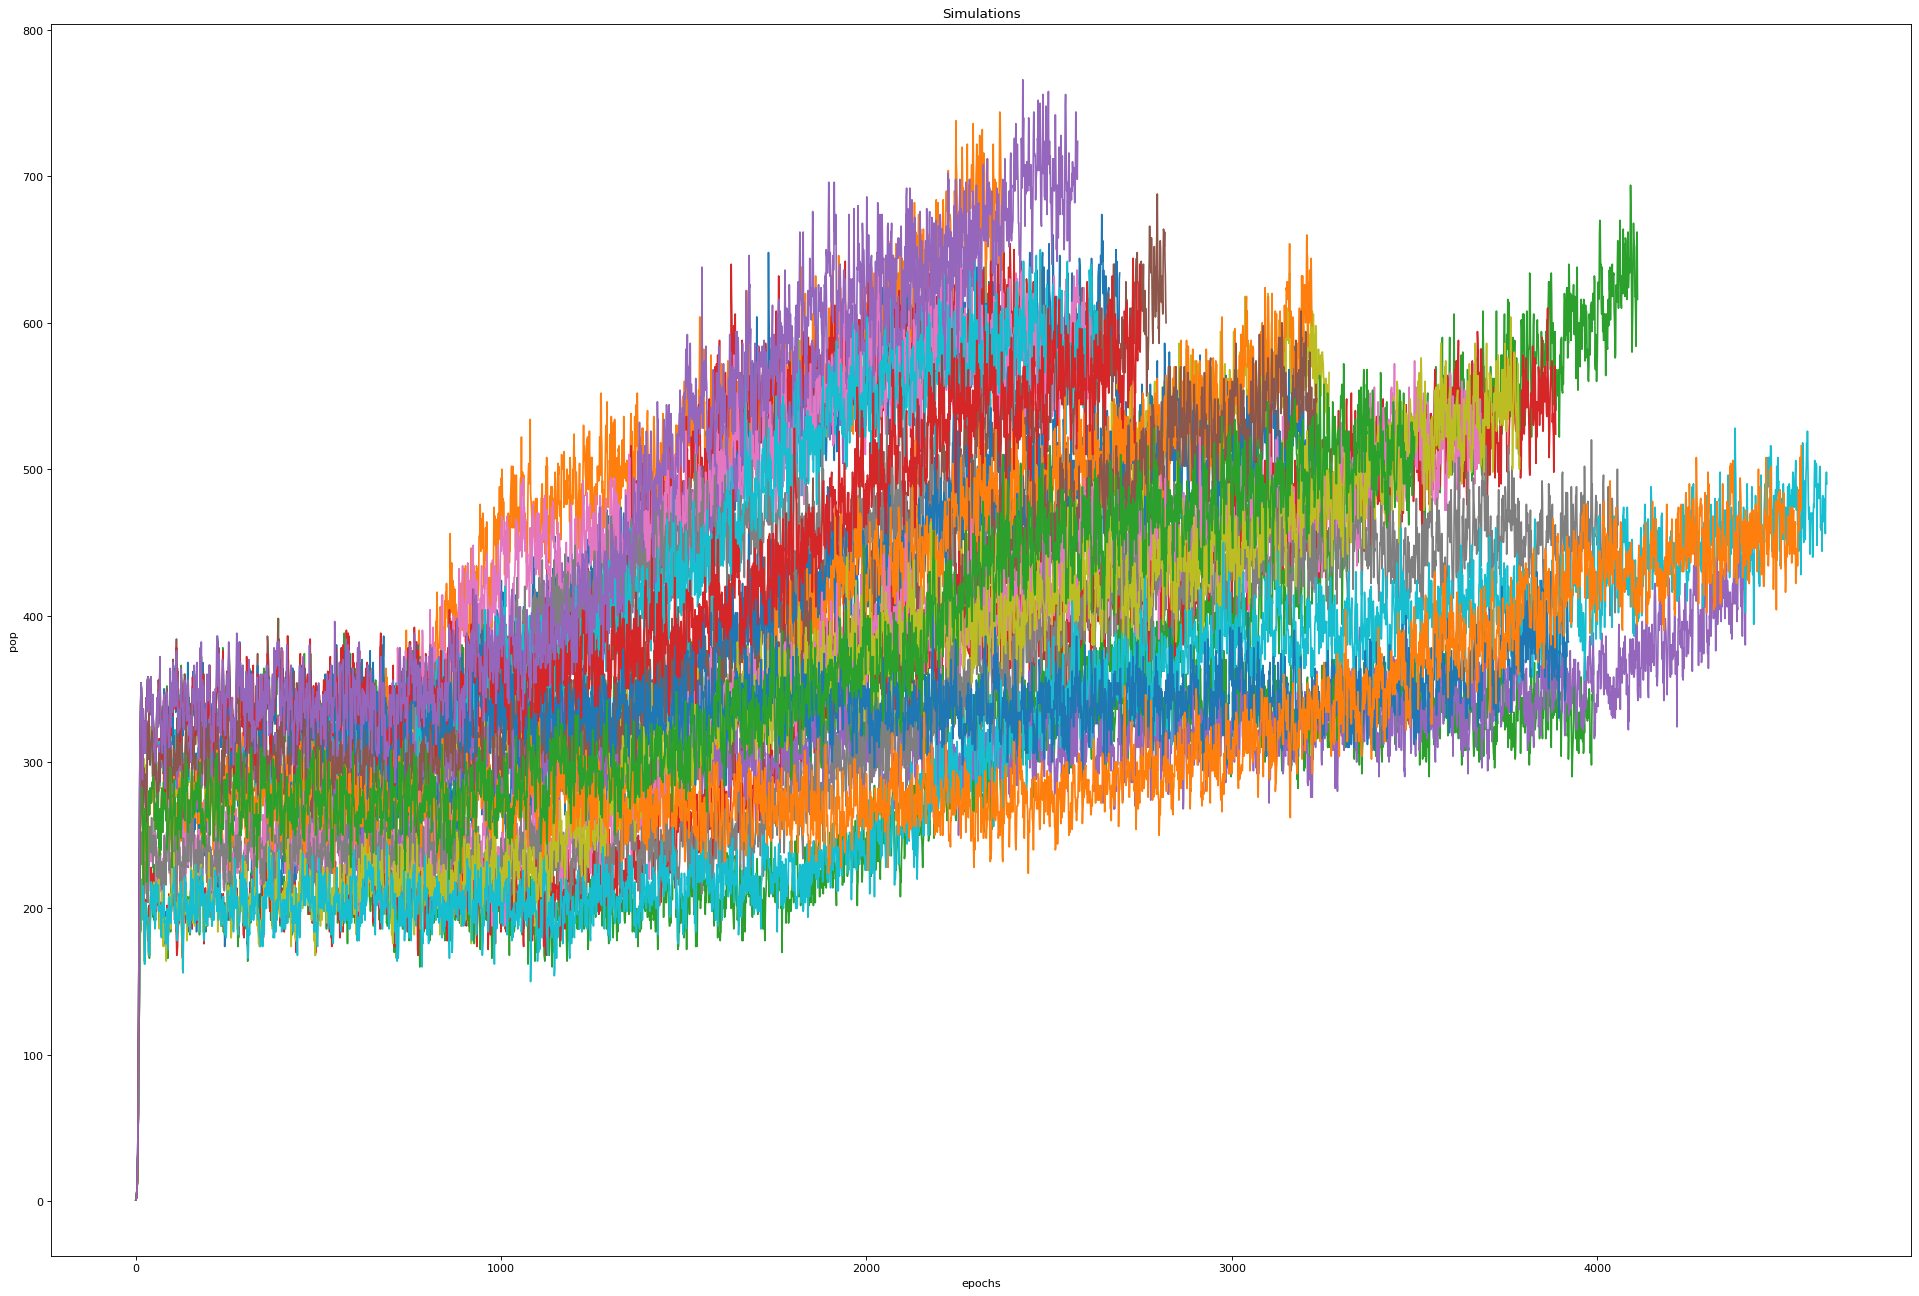

In [33]:
print_all_in_one_frame([data_ for data_ in data if not data_["params"]['auto_stop_at_plateau'] and data_["params"]['realtime_limit_reached']] ,x = "epochs")